In [1]:
%pip install uv
%pip install numpy pandas scikit-learn matplotlib tensorflow seaborn
%pip install pyarrow fastparquet


   ---------------------------------------- 0.0/23.4 MB ? eta -:--:--
    --------------------------------------- 0.5/23.4 MB 5.6 MB/s eta 0:00:05
   - -------------------------------------- 1.0/23.4 MB 4.6 MB/s eta 0:00:05
   - -------------------------------------- 1.0/23.4 MB 4.6 MB/s eta 0:00:05
   ------------ --------------------------- 7.6/23.4 MB 10.4 MB/s eta 0:00:02
   -------------------- ------------------- 11.8/23.4 MB 12.5 MB/s eta 0:00:01
   ----------------------------- ---------- 17.3/23.4 MB 15.6 MB/s eta 0:00:01
   ------------------------------- -------- 18.4/23.4 MB 13.6 MB/s eta 0:00:01
   -------------------------------- ------- 18.9/23.4 MB 12.2 MB/s eta 0:00:01
   --------------------------------- ------ 19.4/23.4 MB 11.0 MB/s eta 0:00:01
   ---------------------------------- ----- 19.9/23.4 MB 10.2 MB/s eta 0:00:01
   ---------------------------------- ----- 20.2/23.4 MB 9.9 MB/s eta 0:00:01
   -------------------------------------- - 22.8/23.4 MB 9.6 MB/s eta

In [2]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhoogla/cicidscollection")

print("Path to dataset files:", path)

  Using cached tqdm-4.67.3-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.3-py3-none-any.whl (78 kB)

   -------------------- ------------------- 2/4 [kagglesdk]
   -------------------- ------------------- 2/4 [kagglesdk]
   ---------------------------------------- 4/4 [kagglehub]

Note: you may need to restart the kernel to use updated packages.


c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\22ad084\.cache\kagglehub\datasets\dhoogla\cicidscollection\versions\2


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split

In [4]:
import os
import pandas as pd

DATA_PATH = r"C:\Users\22ad084\.cache\kagglehub\datasets\dhoogla\cicidscollection\versions\2"

parquet_files = []
for root, dirs, files in os.walk(DATA_PATH):
    for f in files:
        if f.lower().endswith(".parquet"):
            parquet_files.append(os.path.join(root, f))

print("Found parquet files:", len(parquet_files))

dfs = []
for f in parquet_files[:5]:  # start small to avoid RAM issues
    print("Loading:", f)
    df = pd.read_parquet(f, engine="fastparquet")
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())

Found parquet files: 1
Loading: C:\Users\22ad084\.cache\kagglehub\datasets\dhoogla\cicidscollection\versions\2\cic-collection.parquet
Dataset shape: (9167581, 59)
Columns: ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'URG Flag Count', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd P

In [5]:
#PREPARE THE DATA

import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Clean column names
data.columns = data.columns.str.strip()

# Drop duplicates
data = data.drop_duplicates()

# Replace inf and NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

print("After cleaning:", data.shape)

# Find label column (usually 'Label')
print("Columns:", data.columns.tolist())

After cleaning: (9167271, 59)
Columns: ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'URG Flag Count', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Act Data P

Label
Benign            7185881
DDoS-LOIC-HTTP     575364
DoS-Hulk           318740
DDoS-HOIC          198861
Botnet             145968
DDoS               128062
DDoS-NTP           121326
DDoS-TFTP           98833
Bruteforce-SSH      97260
Infiltration        94857
Name: count, dtype: int64


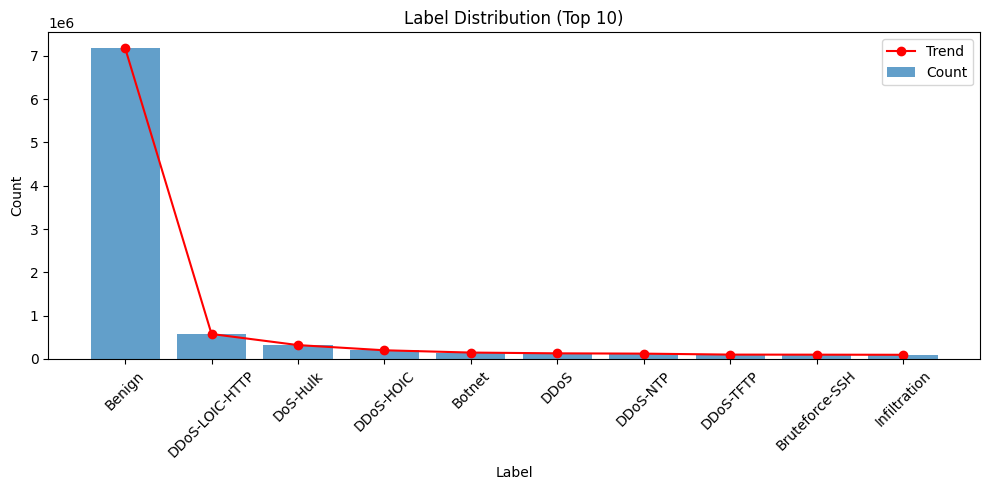

In [6]:
print(data['Label'].value_counts().head(10))
## visualization 

counts = data['Label'].value_counts().head(10)

plt.figure(figsize=(10, 5))

# Bar chart
plt.bar(counts.index.astype(str), counts.values, alpha=0.7, label="Count")

# Line on top
plt.plot(counts.index.astype(str), counts.values, marker='o', color='red', label="Trend")

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution (Top 10)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [7]:
# CREATING A LABEL
labels = data['Label']
features = data.drop(columns=['Label'])

# Binary labels for anomaly detection
y_binary = labels.apply(lambda x: 0 if str(x).lower() in ['benign', 'normal'] else 1)

# Multi-class labels for classification
le = LabelEncoder()
y_multi = le.fit_transform(labels)

print("Classes:", le.classes_)

Classes: ['Benign' 'Botnet' 'Bruteforce-FTP' 'Bruteforce-SSH' 'DDoS' 'DDoS-DNS'
 'DDoS-Ddossim' 'DDoS-HOIC' 'DDoS-LDAP' 'DDoS-LOIC-HTTP' 'DDoS-MSSQL'
 'DDoS-NTP' 'DDoS-NetBIOS' 'DDoS-SNMP' 'DDoS-Slowloris' 'DDoS-Syn'
 'DDoS-TFTP' 'DDoS-UDP' 'DDoS-UDPLag' 'DoS-Goldeneye' 'DoS-Heartbleed'
 'DoS-Hulk' 'DoS-Rudy' 'DoS-Slowbody' 'DoS-Slowheaders' 'DoS-Slowhttptest'
 'DoS-Slowloris' 'DoS-Slowread' 'Infiltration' 'Portscan' 'Webattack-SQLi'
 'Webattack-XSS' 'Webattack-bruteforce']


In [8]:
# Drop label column from features
features = data.drop(columns=['Label'])

# Keep only numeric columns (important!)
features = features.select_dtypes(include=['int64', 'float64'])

print("Features shape:", features.shape)
print("Any non-numeric left?", features.dtypes.unique())

Features shape: (9167271, 22)
Any non-numeric left? [dtype('int64') dtype('float64')]


In [9]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

joblib.dump(scaler, "scaler.save")
print("Scaled shape:", X_scaled.shape)

Scaled shape: (9167271, 22)


###LSTM Autoencoder (Anomaly Detection)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

In [11]:
# Use only normal data
X_normal = X_scaled[y_binary == 0]

# Reshape for LSTM: (samples, timesteps, features)
# timesteps = 1 (flow-based)
X_normal_seq = X_normal.reshape((X_normal.shape[0], 1, X_normal.shape[1]))
X_all_seq = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [12]:
timesteps = X_normal_seq.shape[1]
n_features = X_normal_seq.shape[2]

inputs = Input(shape=(timesteps, n_features))
encoded = LSTM(128, activation='relu', return_sequences=False)(inputs)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(128, activation='relu', return_sequences=True)(decoded)
outputs = TimeDistributed(Dense(n_features))(decoded)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 22)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        77,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1, 22)          │         2,838 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,734 (827.09 KB)

 Trainable params: 211,734 (827.09 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
"""history = autoencoder.fit(
    X_normal_seq, X_normal_seq,
    epochs=20,
    batch_size=512,
    validation_split=0.1,
    shuffle=True
)

autoencoder.save("lstm_autoencoder.keras")"""

'history = autoencoder.fit(\n    X_normal_seq, X_normal_seq,\n    epochs=20,\n    batch_size=512,\n    validation_split=0.1,\n    shuffle=True\n)\n\nautoencoder.save("lstm_autoencoder.keras")'

####Anomaly Detection via Reconstruction Error

In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# Reconstruct
X_pred = autoencoder.predict(X_normal_seq, batch_size=512)

# Compute reconstruction error (MSE per sample)
recon_error = np.mean(np.square(X_normal_seq - X_pred), axis=(1, 2))

print("Reconstruction error stats:")
print("Min:", recon_error.min())
print("Max:", recon_error.max())
print("Mean:", recon_error.mean())

14035/14035 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
Reconstruction error stats:
Min: 0.002650945262968271
Max: 483684.9772529844
Mean: 0.9580343667972433


In [50]:
from sklearn.metrics import roc_curve

# Ensure y_binary matches the data
y_binary = labels.apply(lambda x: 0 if str(x).lower() in ['benign', 'normal'] else 1)

# Compute recon_error for all data
X_pred_all = autoencoder.predict(X_all_seq, batch_size=512)
recon_error_all = np.mean(np.square(X_all_seq - X_pred_all), axis=(1, 2))

fpr, tpr, thresholds = roc_curve(y_binary, recon_error_all)

# Youden’s J statistic: maximize (TPR - FPR)
best_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_idx]

print("Best threshold (ROC):", best_threshold)

y_anomaly_pred = (recon_error_all > best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_binary, y_anomaly_pred))

print("Classification Report:")
print(classification_report(y_binary, y_anomaly_pred))


17905/17905 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step
17905/17905 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step
Best threshold (ROC): 1.6575956251370527
Confusion Matrix:
Best threshold (ROC): 1.6575956251370527
Confusion Matrix:
[[7022190  163691]
 [1752535  228855]]
Classification Report:
[[7022190  163691]
 [1752535  228855]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88   7185881
           1       0.58      0.12      0.19   1981390

    accuracy                           0.79   9167271
   macro avg       0.69      0.55      0.54   9167271
weighted avg       0.75      0.79      0.73   9167271

              precision    recall  f1-score   support

           0       0.80      0.98      0.88   7185881
           1       0.58      0.12      0.19   1981390

    accuracy                           0.79   9167271
   macro avg       0.69      0.55      0.54   9167271
weighted avg       0.75      0.79      0.73   9167271



In [ ]:
# y_multiclass: array of strings like 'Benign', 'DDoS', ...
y_multiclass = data["Label"].values

# 0 = Benign, 1 = Attack
y_binary = (y_multiclass != "Benign").astype(int)

print("Binary label distribution:", np.bincount(y_binary))

X_pred = autoencoder.predict(X_all_seq, batch_size=512)

mse = np.mean(np.square(X_all_seq - X_pred), axis=(1, 2))

print("MSE stats:", mse.min(), mse.mean(), mse.max())

Binary label distribution: [7186189 1981392]
17905/17905 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step
MSE stats: 0.0023739220773288934 0.996307406436949 483684.9772529844


In [20]:

%pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.4/72.0 MB 8.4 MB/s eta 0:00:09
   -- ------------------------------------- 4.5/72.0 MB 8.9 MB/s eta 0:00:08
   --- ------------------------------------ 6.6/72.0 MB 9.1 MB/s eta 0:00:08
   ---- ----------------------------------- 8.7/72.0 MB 9.2 MB/s eta 0:00:07
   ----- ---------------------------------- 10.7/72.0 MB 9.3 MB/s eta 0:00:07
   ------- -------------------------------- 12.8/72.0 MB 9.4 MB/s eta 0:00:07
   -------- ------------------------------- 14.9/72.0 MB 9.5 MB/s eta 0:00:07
   --------- ------------------------------ 17.3/72.0 MB 9.7 MB/s eta 0:00:06
   ---------- ----------------------------- 19.7/72.0 MB 9.9 MB/s eta 0:00:06
   ------------ --------------------------- 21.8/72.0 MB 9.8 MB/s eta 0:00:06
   ------------- -------------------------- 24.1/72.0 MB 10.0 MB/s eta 0:00:05
   --

In [52]:
from xgboost import XGBClassifier

# Define X_attack_train and y_attack_train
X_attack_train = X_scaled[y_binary == 1]
y_attack_train = y_multi[y_binary == 1] - 1  # Shift to start from 0

clf = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    tree_method="hist",
    n_jobs=-1
)

clf.fit(X_attack_train, y_attack_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [53]:
# Define X_test_seq
X_test_seq = X_all_seq
X_test_features = X_scaled  # assuming

# Step 1: Use AE to detect anomalies
X_pred = autoencoder.predict(X_test_seq, batch_size=512)
recon_error = np.mean(np.square(X_test_seq - X_pred), axis=(1, 2))

is_anomaly = recon_error > best_threshold
print("Total anomalies detected:", is_anomaly.sum())

# Step 2: For anomalous samples, classify attack type
X_anomaly_features = X_test_features[is_anomaly]  # tabular features
attack_type_pred = clf.predict(X_anomaly_features) + 1  # Shift back to original indices

# Create final predictions
final_pred = np.array(["Benign"] * len(X_test_features), dtype=object)
final_pred[is_anomaly] = le.classes_[attack_type_pred]


17905/17905 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step
17905/17905 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step
Total anomalies detected: 392546
Total anomalies detected: 392546


In [61]:
# Define X_all_scaled
X_all_scaled = X_scaled

# Load the model if not already loaded
from tensorflow.keras.models import load_model
model = load_model("attack_classifier.keras")

# Take only anomalous samples
X_anomaly = X_all_scaled[is_anomaly]

# Predict attack types
attack_probs = model.predict(X_anomaly, batch_size=1024)
attack_pred_classes = np.argmax(attack_probs, axis=1)


384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [62]:
# Initialize all as "Benign"
final_pred = np.array(["Benign"] * len(X_all_scaled), dtype=object)

# Map class indices to names
class_names = le.classes_
final_pred[is_anomaly] = class_names[attack_pred_classes]

In [57]:
# Define y_true_multiclass
y_true_multiclass = labels

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_true_multiclass, final_pred))
print(classification_report(y_true_multiclass, final_pred))

[[7185881       0       0 ...       0       0       0]
 [ 145968       0       0 ...       0       0       0]
 [   5984       0       0 ...       0       0       0]
 ...
 [     99       0       0 ...       0       0       0]
 [    876       0       0 ...       0       0       0]
 [   2020       0       0 ...       0       0       0]]


c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

                      precision    recall  f1-score   support

              Benign       0.78      1.00      0.88   7185881
              Botnet       0.00      0.00      0.00    145968
      Bruteforce-FTP       0.00      0.00      0.00      5984
      Bruteforce-SSH       0.00      0.00      0.00     97260
                DDoS       0.00      0.00      0.00    128062
            DDoS-DNS       0.00      0.00      0.00      3668
        DDoS-Ddossim       0.00      0.00      0.00      5115
           DDoS-HOIC       0.00      0.00      0.00    198861
           DDoS-LDAP       0.00      0.00      0.00      2092
      DDoS-LOIC-HTTP       0.00      0.00      0.00    575364
          DDoS-MSSQL       0.00      0.00      0.00     11784
            DDoS-NTP       0.00      0.00      0.00    121326
        DDoS-NetBIOS       0.00      0.00      0.00       675
           DDoS-SNMP       0.00      0.00      0.00      2017
      DDoS-Slowloris       0.00      0.00      0.00      1858
       

c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


###Deep Learning Attack Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

num_classes = len(np.unique(y_multi))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 33)             │         2,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,185 (192.13 KB)

 Trainable params: 49,185 (192.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
"""history_cls = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=512,
    validation_split=0.1,
    shuffle=True
)

model.save("attack_classifier.keras")"""

Epoch 1/30
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - accuracy: 0.9401 - loss: 0.2402 - val_accuracy: 0.9539 - val_loss: 0.1671
Epoch 2/30
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9514 - loss: 0.1769 - val_accuracy: 0.9565 - val_loss: 0.1543
Epoch 3/30
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9529 - loss: 0.1686 - val_accuracy: 0.9537 - val_loss: 0.1568
Epoch 4/30
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 97s 7ms/step - accuracy: 0.9538 - loss: 0.1642 - val_accuracy: 0.9577 - val_loss: 0.1476
Epoch 5/30
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 149s 12ms/step - accuracy: 0.9544 - loss: 0.1604 - val_accuracy: 0.9566 - val_loss: 0.1462
Epoch 6/30
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - accuracy: 0.9549 - loss: 0.1576 - val_accuracy: 0.9581 - val_loss: 0.1453
Epoch 7/30
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - accuracy: 0.9553 - loss: 0.1555 - val_accuracy: 0.9587 - val_loss: 0.1429
Epoch 8/30
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - accuracy

###Evaluate Classifier


In [ ]:
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", acc)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

57296/57296 ━━━━━━━━━━━━━━━━━━━━ 45s 778us/step - accuracy: 0.9600 - loss: 0.1342
Test Accuracy: 0.9599761366844177
57296/57296 ━━━━━━━━━━━━━━━━━━━━ 32s 553us/step
[[1434140      76      16 ...       0       0       0]
 [    622   28568       0 ...       0       0       0]
 [     32       0    1165 ...       0       0       0]
 ...
 [     19       0       0 ...       0       0       0]
 [    148       0       0 ...       0      27       0]
 [    358       0       0 ...       0       0      45]]


c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                      precision    recall  f1-score   support

              Benign       0.96      1.00      0.98   1437177
              Botnet       1.00      0.98      0.99     29194
      Bruteforce-FTP       0.99      0.97      0.98      1197
      Bruteforce-SSH       1.00      0.99      1.00     19452
                DDoS       0.97      0.95      0.96     25612
            DDoS-DNS       0.51      0.30      0.38       734
        DDoS-Ddossim       0.85      0.67      0.75      1023
           DDoS-HOIC       0.95      0.82      0.88     39772
           DDoS-LDAP       0.46      0.37      0.41       418
      DDoS-LOIC-HTTP       0.97      0.97      0.97    115073
          DDoS-MSSQL       0.86      0.87      0.86      2357
            DDoS-NTP       1.00      0.99      0.99     24265
        DDoS-NetBIOS       0.53      0.70      0.60       135
           DDoS-SNMP       0.49      0.79      0.61       403
      DDoS-Slowloris       0.81      0.71      0.76       372
       

c:\Users\22ad084\Downloads\final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\22ad084\Downloads\final\lstm_autoencoder.keras")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 22)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        77,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1, 22)          │         2,838 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,204 (2.42 MB)

 Trainable params: 211,734 (827.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 423,470 (1.62 MB)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\22ad084\Downloads\final\attack_classifier.keras")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 33)             │         2,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,557 (576.40 KB)

 Trainable params: 49,185 (192.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 98,372 (384.27 KB)